# Проект 9

# Защита персональных данных клиентов

Необходимо разработать такой метод преобразования данных клиентов страховой компании, который не ухудшил бы качество модели линейной регрессии, предсказывающей величину страховых выплат.

## Содержание
1. [Загрузка данных](#introduction) <br>
   1.1 [Импорт библиотек](#subparagraph1) <br>
   1.2 [Изучение набора данных](#subparagraph2) <br>
2. [Умножение матриц](#paragraph2) <br> 
3. [Алгоритм преобразования](#paragraph3) <br> 
   3.1 [Создание случайной матрицы](#subparagraph3) <br>
   3.2 [Преобразование данных](#subparagraph4) <br>
4. [Проверка алгоритма](#paragraph4) <br>
5. [Вывод](#paragraph5) <br>

## 1. Загрузка данных
<a name="introduction"></a>

### 1.1 Импорт библиотек
<a name="subparagraph1"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

### 1.2 Изучение набора данных
<a name="subparagraph2"></a>

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Изучим общую информацию о датафрейме

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Датафрейм включает в себя 5 количественных признаков: 4 - описательных признака, 1 - целевой признак.

Переименуем столбцы для удобства работы с данными.

In [5]:
data.rename(columns = {'Пол' : 'sex', 'Возраст' : 'age', 'Зарплата' : 'salary', 'Члены семьи' : 'family members', 'Страховые выплаты' : 'insurance benefits'}, inplace = True)

Заменим тип данных для признаков "возраст" и "заработная плата".

In [6]:
features = ['age', 'salary']
data[features] = data[features].astype('int')

Проверим данные на наличие дубликатов.

In [7]:
data.duplicated().sum()

153

Удалим обнаруженные дубликаты

In [8]:
data.drop_duplicates(inplace = True)

Посмотрим на статистическую информацию

In [9]:
data.describe()

,sex,age,salary,family members,insurance benefits
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811223,1.203425,0.152259
std,0.500049,8.487995,9972.952441,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Посмотрим на корреляцию признаков в данных.

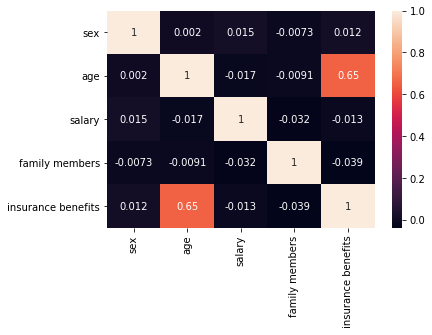

In [10]:
sns.heatmap(data.corr(), annot = True)

Наблюдается положительная корреляция между возрастом клиентов и величиной страховых выплат.

## 2. Умножение матриц
<a name="paragrapgh2"></a>

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** нет, качество линейной регрессии не изменится.

**Обоснование:** 

Обозначим новую матрицу признаков как X'. При умножении на произвольную обратимую матрицу она принимает следующий вид: 
$$
X' = XP
$$

Тогда новый вектор весов можно выразить как: 
$$
w' = ((XP)^T(XP))^{-1}(XP)^Ty = (P^T X^T X P)^{-1} P^T X^T y = P^{-1} (X^T X) ^ {-1} (P^T)^{-1} P^T X^T y = P^{-1}w
$$

Новые предсказания принимают следующий вид: 
$$
a' = X'w' = X P P^{-1} w = Xw = a
$$

Поскольку в выражении для новых предсказаний произвольная матрица P умножается на обратную ей матрицу (что дает в результате единичную матрицу), конечные предсказания и, как следствие, качество линейной регрессии не изменится.



## 3. Алгоритм преобразования
<a name="paragrapgh3"></a>

**Алгоритм**

В целях защиты данных и сохранения качества линейной регрессии умножим признаки в датасете на обратимую матрицу P. <br>
1) На первом шаге сгенерируем случайную матрицу <br> 
2) На втором шаге проверим сгенерированную матрицу на обратимость <br>

**Обоснование**

После теоретического доказательства мы убедились, что шифрование признаков с помощью умножения на обратную матрицу не влияет на качество линейной регрессии. Поэтому воспользуемся этим методов для шифрования признаков. 

### 3.1 Создание случайной матрицы
<a name="subparagraph3"></a>

Сгенерируем квадратную матрицу 4*4, поскольку в датасете у нас 4 объясняющих признака.

In [11]:
random_P = np.random.randint(100, size = (4,4))

In [12]:
random_P

array([[43, 21, 83, 49],
       [61, 43,  9, 54],
       [ 5, 29, 87, 28],
       [39, 87, 15, 75]])

Для проверки обратимости создадим обратную матрицу.

In [13]:
np.linalg.inv(random_P)

array([[-0.03552796,  0.05894114,  0.03325234, -0.03164023],
       [-0.0589376 ,  0.04706012,  0.05404104, -0.01555271],
       [-0.00669226,  0.00893423,  0.01850068, -0.00896729],
       [ 0.0881806 , -0.08702597, -0.08367896,  0.04962085]])

### 3.2 Преобразование данных
<a name="subparagraph4"></a>

Выделим в датасете объясняющие признаки и целевой признак

In [14]:
features = data.drop('insurance benefits', axis = 1)

In [15]:
target = data['insurance benefits']

In [16]:
features.shape

(4847, 4)

In [17]:
target.shape

(4847,)

Рассчитаем веса для признаков на исходных данных

In [18]:
w  = np.linalg.inv(features.T.dot(features)).dot(features.T).dot(target)

Рассчитаем предсказания по признакам

In [19]:
a = features @ w

Произведем преобразование признаков

In [20]:
transformed_features = features @ random_P

Рассчитаем веса для преобразованных признаков, умноженных на сгенерированную матрицу

In [21]:
new_w = np.linalg.inv(transformed_features.T.dot(transformed_features)).dot(transformed_features.T).dot(target)

Рассчитаем предсказания для преобразованных данных

In [22]:
new_a = transformed_features @ new_w

Посмотрим на расхождения предсказаний

In [23]:
difference_sum = (a - new_a).sum()

In [24]:
print(difference_sum)

-0.00019408360992700935


Сумма расхождений незначительная - следовательно, качество линейной регрессии не изменится.

## 4. Проверка алгоритма
<a name="paragraph4"></a>

Обучим модель линейной регрессии и сравним значение MSE и R2 до и после преобразования признаков. 

Обучим модель линейной регрессии на исходных данных

In [25]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
mse = mean_squared_error(target, predictions)
r2 = r2_score(target, predictions)
print('MSE:', mse)
print('R2:', r2)

MSE: 0.1252726382276536
R2: 0.4302010046633359


Обучим модель линейной регрессии на новых данных

In [26]:
model = LinearRegression()
model.fit(transformed_features, target)
predictions = model.predict(transformed_features)
mse = mean_squared_error(target, predictions)
r2 = r2_score(target, predictions)
print('MSE:', mse)
print('R2:', r2)

MSE: 0.12527263822765322
R2: 0.43020100466333766


Метрики MSE и R2 после преобразования признаков не изменились. 

## 5. Вывод
<a name="paragraph5"></a>

В ходе проекта были выполнены следующие шаги: <br>
1. Загружены и изучены данные <br> 
2. Теоретически доказано, что при умножении признаков на обратимую матрицу качество регрессии на изменяется <br>
3. Произведено преобразование данных о клиентах страховой компании, и в результате обучения модели линейной регрессии продемонстрировано, что ее качество не меняется после умножения признаков на обратимую матрицу <br>